In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#To read/import dataset
data=pd.read_csv('train.csv')


In [5]:
#To Know last 10 elements
data.tail(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#How many survived
num=data[data['Survived']==1]['Survived'].count()

<AxesSubplot:>

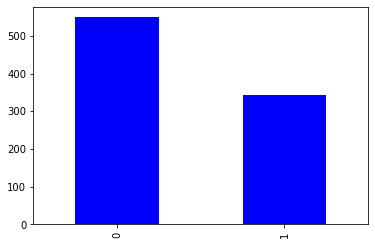

In [8]:
#Survived
survival=data['Survived'].value_counts()
survival.plot(kind='bar',color='blue')

In [9]:
#Survival rate
(survival[1].sum()/survival.sum())*100

38.38383838383838

In [10]:
#Children died but their relatives survived
child=data[data['Age']<18]
cond1=child[(child['SibSp']!=0) | (child['Parch']!=0)]['Survived'].value_counts()
cond1[0]

39

<AxesSubplot:xlabel='Pclass,Survived'>

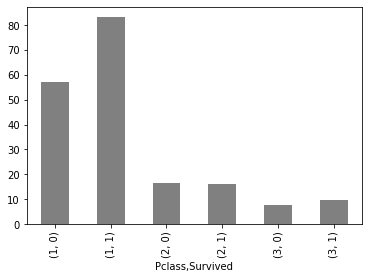

In [11]:
#no.of people above 50 travelling and have survived along with their class 
senior=data[data['Age']>=50]
senior.groupby(['Pclass','Survived'])['Fare'].mean().plot(kind='bar',color='grey')

<AxesSubplot:xlabel='Sex', ylabel='count'>

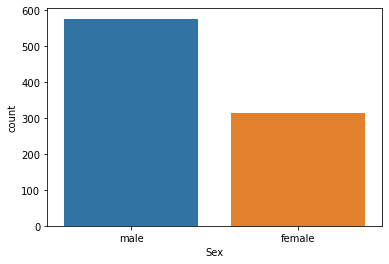

In [12]:
#Countplot
sns.countplot(x='Sex',data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

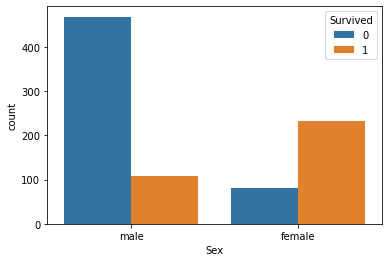

In [13]:
sns.countplot(x='Sex',hue='Survived',data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

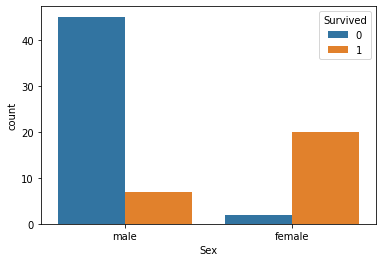

In [14]:
sns.countplot(x='Sex',hue='Survived',data=senior)

In [15]:
senior.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       male      29
        female    15
2       male      13
        female     6
3       male      10
        female     1
Name: Sex, dtype: int64

In [16]:
#Sex ratio initially
total=data['Sex'].value_counts()
total['female']/total['male']

0.5441941074523396

In [17]:
#Sex ratio after the incident
survive=data[data['Survived']==1]
left=survive['Sex'].value_counts()
left['female']/left['male']

2.1376146788990824

In [18]:
data[(data['SibSp']==0) & (data['Parch']==0)]['Survived'].value_counts()

0    374
1    163
Name: Survived, dtype: int64

In [19]:
data[(data['SibSp']==0) & (data['Parch']==0) & (data['Survived']==1)]['Survived'].value_counts()

1    163
Name: Survived, dtype: int64

In [20]:
data[data['Embarked']=='Q']['Survived'].value_counts()

0    47
1    30
Name: Survived, dtype: int64

In [21]:
#Survival rate of people belonging to Pclass=1 and embarked='Q'
we=data[(data['Pclass']==1) & (data['Embarked']=='Q')]['Survived'].value_counts()
(we[1]/we.sum())*100

50.0

<AxesSubplot:xlabel='Pclass,Sex'>

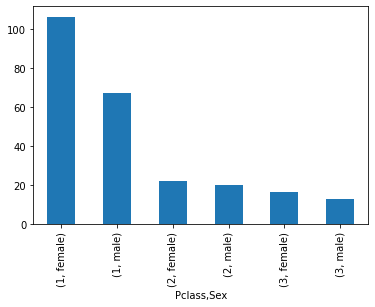

In [22]:
#Fare based on Pclass with hue on gender
data.groupby(['Pclass','Sex'])['Fare'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

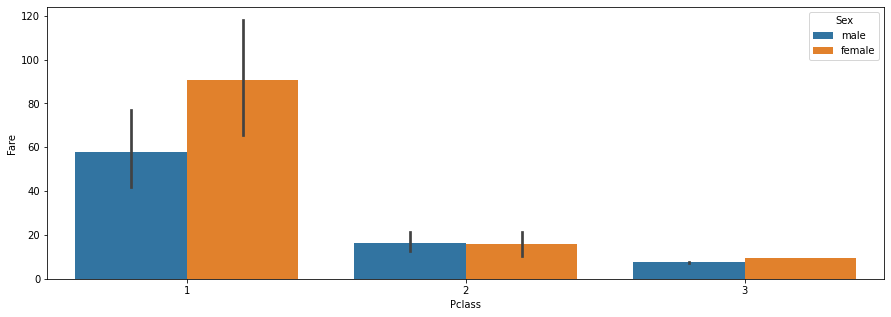

In [23]:
#Fare of gender in different Pclass for seniors i.e. Age>50
plt.figure(figsize=(15,5))
sns.barplot(x='Pclass',y='Fare',hue='Sex',data=senior)

<AxesSubplot:xlabel='Sex'>

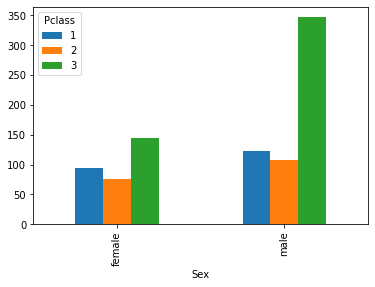

In [24]:
pd.crosstab(data.Sex,data.Pclass).plot(kind='bar')

<AxesSubplot:xlabel='Survived'>

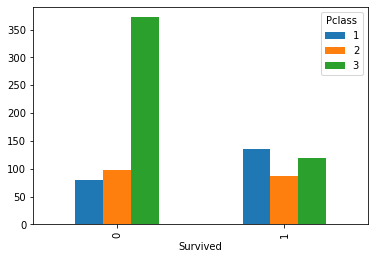

In [25]:
pd.crosstab(data.Survived,data.Pclass).plot(kind='bar')

<AxesSubplot:xlabel='Embarked'>

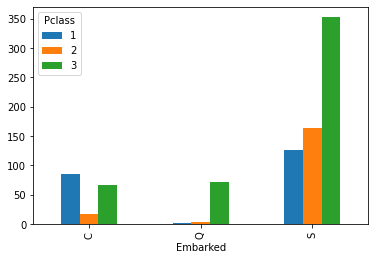

In [26]:
pd.crosstab(data.Embarked,data.Pclass).plot(kind='bar')

<AxesSubplot:ylabel='Pclass'>

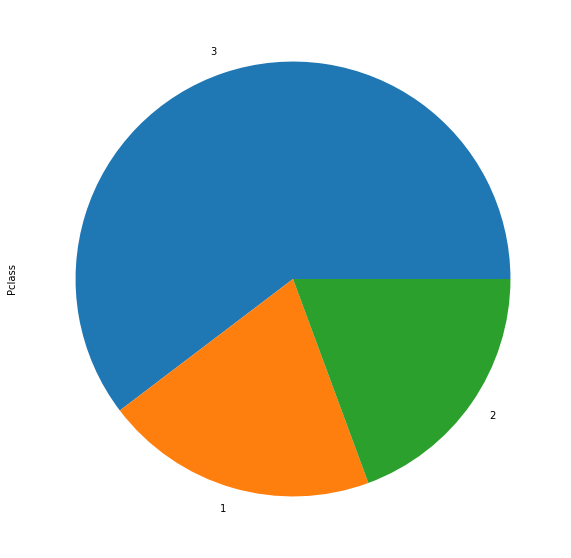

In [27]:
#In which class max single individuals are travelling
plt.figure(figsize=(15,10))
data[(data['SibSp']==0) & (data['Parch']==0)]['Pclass'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Sex'>

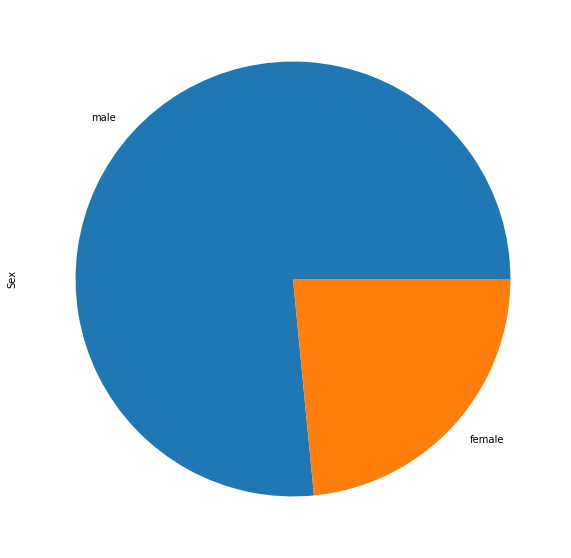

In [28]:
#Maximum individuals gender 
plt.figure(figsize=(15,10))
data[(data['SibSp']==0) & (data['Parch']==0)]['Sex'].value_counts().plot(kind='pie')

In [29]:
data.shape

(891, 12)

In [30]:
#To drop Cabin column
data.drop(['Cabin'],axis=1,inplace=True)

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

<AxesSubplot:>

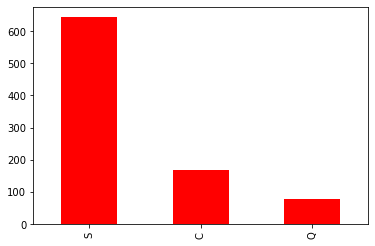

In [33]:
#To fill the Embarked column best way is to fill it by mode 
data['Embarked'].value_counts().plot(kind='bar',color='red')

In [34]:
data['Embarked'].fillna('S',inplace=True)

<AxesSubplot:>

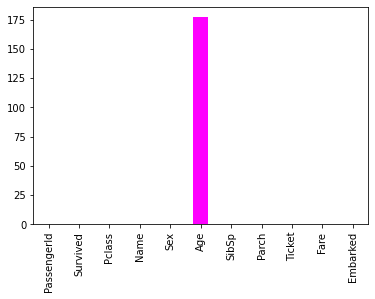

In [35]:
data.isnull().sum().plot(kind='bar',color='magenta')

In [36]:
#Class wise mean of age 
data.groupby('Pclass')["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [37]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38.233441
        if Pclass==2:
            return 29.877630
        if Pclass==3:
            return 25.140620
    else:
        return Age
            

In [38]:
data["Age"]=data[["Age","Pclass"]].apply(input_age,axis=1)

<AxesSubplot:>

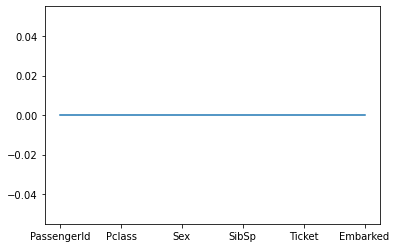

In [39]:
data.isnull().sum().plot()

In [40]:
#Converting Categorical values into Numerical Ones
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Sex']=lb.fit_transform(data["Sex"])


In [41]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [42]:
data['Embarked']=lb.fit_transform(data["Embarked"])

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


<AxesSubplot:>

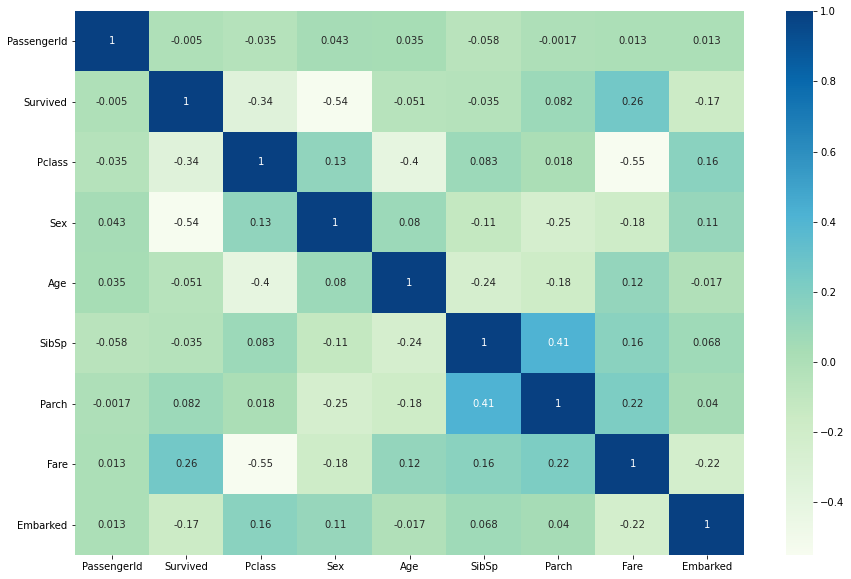

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='GnBu')

In [45]:
#Dropping non essential data
data.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [46]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [47]:
x=data.drop('Survived',axis=1)
y=data['Survived']


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712,), (179,))

# Using logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_test

C:\Users\kusha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


347    1
674    0
791    0
836    0
56     1
      ..
694    0
428    0
431    1
563    0
484    1
Name: Survived, Length: 179, dtype: int64

In [53]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
lr=accuracy_score(y_test,y_pred)*100
lr

83.79888268156425

# Using NAive-Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()

In [57]:
classifier.fit(X_train,y_train)

GaussianNB()

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
nb=accuracy_score(y_test,y_pred)*100
nb

84.91620111731844

In [61]:
#Using Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [63]:
#Accuracy using Decision Tree
from sklearn import metrics
dt=metrics.accuracy_score(y_test,y_pred)*100
dt

77.09497206703911

In [64]:
feature_cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

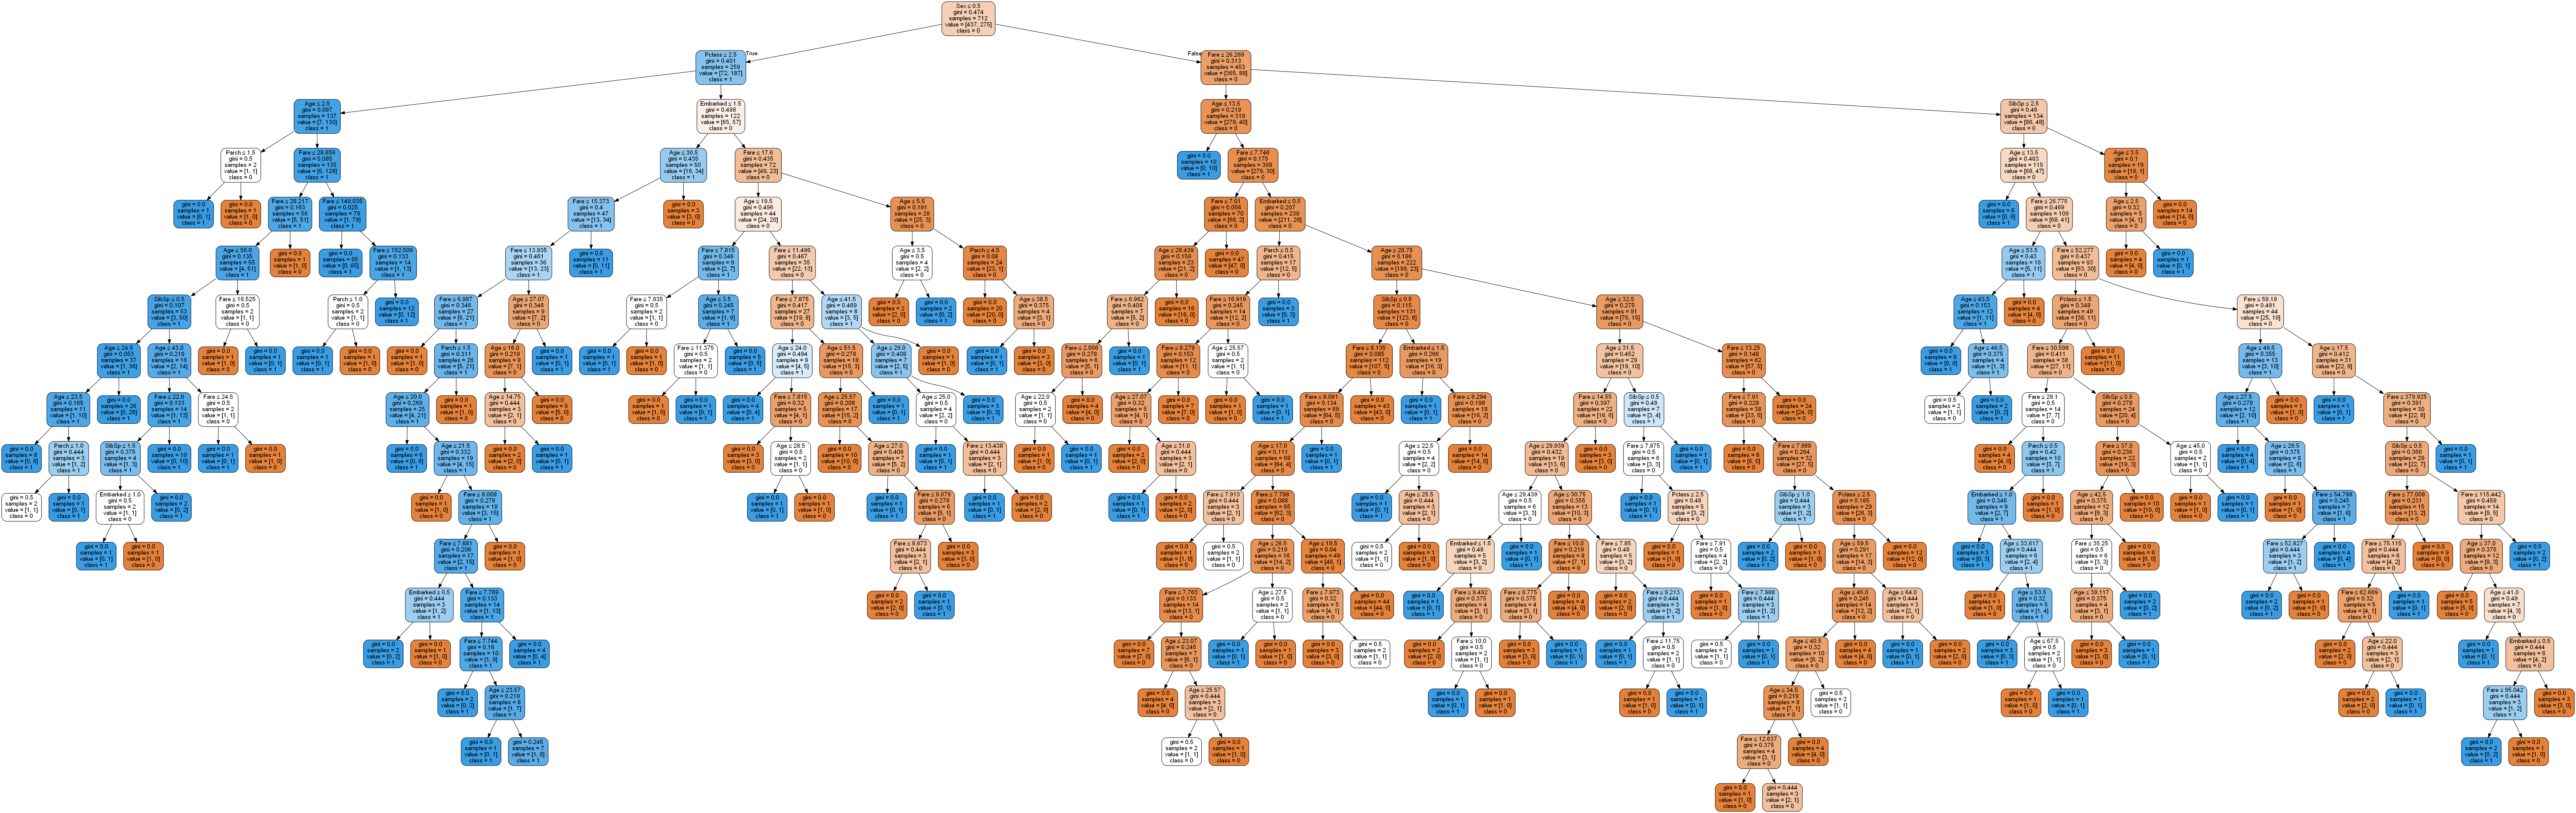

<Figure size 1080x720 with 0 Axes>

In [65]:
#Visualizing decision tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
plt.figure(figsize=(15,10))
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

# SVM

In [66]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel='linear')
svc_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [67]:
y_pred=svc_classifier.predict(X_test)

In [68]:
from sklearn import metrics
sv=metrics.accuracy_score(y_test,y_pred)*100
sv

83.24022346368714

# Using KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(3,10):
    knn_classifier=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn_classifier.fit(X_train,y_train)
    y_pred=knn_classifier.predict(X_test)
    from sklearn import metrics
    print(i, metrics.accuracy_score(y_test,y_pred)*100)

3 73.18435754189943
4 71.50837988826815
5 73.18435754189943
6 72.62569832402235
7 71.50837988826815
8 68.71508379888269
9 75.41899441340783


In [70]:
#Hence maximum accuracy in KNN is at n=9
knn_classifier=KNeighborsClassifier(n_neighbors=9,metric='euclidean')
knn_classifier.fit(X_train,y_train)
y_pred=knn_classifier.predict(X_test)
from sklearn import metrics
kn=metrics.accuracy_score(y_test,y_pred)*100
kn

75.41899441340783

In [71]:
#Important columns in model
from sklearn.ensemble import RandomForestClassifier
radm_clf=RandomForestClassifier(max_depth=10,n_estimators=40)
radm_clf.fit(X_train,y_train)
feature_rank=pd.DataFrame({'feature':X_train.columns,'importance':radm_clf.feature_importances_})

<AxesSubplot:xlabel='importance', ylabel='feature'>

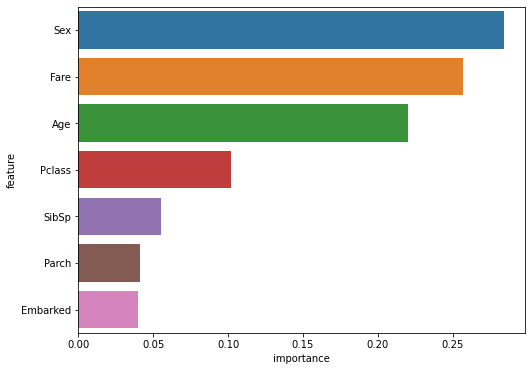

In [72]:
feature_rank=feature_rank.sort_values('importance',ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(y='feature',x='importance',data=feature_rank)

In [73]:
#Using RandomForestClassifier method
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
tuned_parameters=[{'max_depth':[10,20,30,40],'n_estimators':[10,20,30,40,50,60,70,80,90,100]}]
radm_clf=RandomForestClassifier()
clf_grid=GridSearchCV(radm_clf,tuned_parameters,cv=5,scoring='accuracy')
clf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 20, 30, 40],
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100]}],
             scoring='accuracy')

In [74]:
clf_grid.best_score_*100

83.00797793755541

In [75]:
clf_grid.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [76]:
#FInal model using best params
radm_clf=RandomForestClassifier(max_depth=10,n_estimators=40,max_features='auto')
radm_clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, n_estimators=40)

In [77]:
y_pred=radm_clf.predict(X_test)
rf=accuracy_score(y_test,y_pred)*100
rf

82.68156424581005

In [78]:
feature=['LogisticRegression','NaiveBayes','DecisionTree','SVM','KNN','RandomForest']
accurate=[lr,nb,dt,sv,kn,rf]
accurate

[83.79888268156425,
 84.91620111731844,
 77.09497206703911,
 83.24022346368714,
 75.41899441340783,
 82.68156424581005]

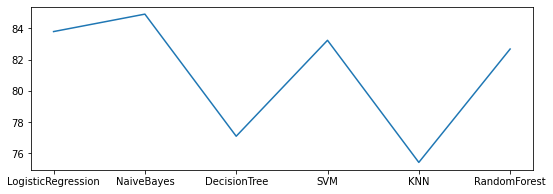

In [83]:
names = feature
values = accurate

plt.figure(figsize=(9, 3))


plt.plot(names, values)
plt.show()


# Thank You